In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [5]:
data = data[:-154389]
data.shape


(20000, 19)

In [6]:
print("---------- Data NA:")
print(data.isna().sum())
print("---------- Data null:")
print(data.isnull().sum())

---------- Data NA:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64
---------- Data null:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [7]:
data = data.set_index("name")


In [8]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,"['Lange', 'Andy Moor', 'Stadium4']",0.439,203612,0.937,0,2Cu7GOgViPVDx9QmhWOrIm,0.895000,11,0.3300,-10.203,0,0,2021-01-22,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,['Bad Bunny'],0.811,130014,0.637,1,5RubKOuDoPn5Kj5TLVxSxY,0.000572,10,0.1180,-4.835,0,90,2020-11-27,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,['Above & Beyond'],0.646,206748,0.792,0,4WxGMzTRECd5KMfPUPUAjZ,0.547000,7,0.2390,-8.355,1,0,2021-01-22,0.0358,130.012,0.4270,2021


In [9]:
num = data.select_dtypes(np.number)


In [10]:
num

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


In [11]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.525564,0.552576,2.215271e+05,0.465127,0.071100,0.161390,5.183650,0.202078,-11.541631,0.719000,37.658950,0.097281,116.676079,0.550017,1970.407750
std,0.381800,0.169744,1.036479e+05,0.263658,0.256998,0.312065,3.481268,0.168593,5.319268,0.449499,25.940967,0.164314,30.440957,0.254885,29.233344
min,0.000000,0.000000,1.037100e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-47.046000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.112000,0.436000,1.678498e+05,0.244000,0.000000,0.000000,2.000000,0.098200,-14.452250,0.000000,12.000000,0.034700,93.866500,0.349000,1945.000000
50%,0.579000,0.566000,2.002000e+05,0.438000,0.000000,0.000146,5.000000,0.136000,-10.860000,1.000000,45.000000,0.044900,114.817500,0.568000,1970.000000
75%,0.921000,0.679000,2.546068e+05,0.681000,0.000000,0.075800,8.000000,0.258000,-7.599000,1.000000,60.000000,0.073500,133.993250,0.759000,1995.000000
max,0.996000,0.988000,2.593268e+06,1.000000,1.000000,1.000000,11.000000,0.996000,0.878000,1.000000,96.000000,0.967000,221.741000,0.991000,2021.000000


In [12]:
X_prep = StandardScaler().fit_transform(num)


In [29]:
pd.DataFrame(X_prep, columns=num.columns).head(20)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367
5,1.232185,-0.757488,-0.220946,-0.834914,-0.276663,2.043248,-0.052755,0.195280,0.013467,0.625156,-1.104803,-0.350444,-0.420696,-0.286477,-1.724367
6,1.221708,1.351625,-0.254011,-1.546838,-0.276663,-0.517176,-0.052755,-0.154684,-0.171338,0.625156,-1.259003,-0.231765,-1.019181,-0.247242,-1.724367
7,1.232185,-0.462920,-0.341106,-0.857671,-0.276663,0.078864,1.096280,-0.041984,0.343971,0.625156,-1.451754,-0.416173,-1.244804,-0.721979,-1.724367
8,1.232185,-0.492376,-0.720602,-0.861464,-0.276663,2.559180,0.809021,-0.314837,-1.348973,0.625156,-1.451754,-0.141083,0.439679,0.278499,-1.724367
9,-1.358713,0.108544,2.458161,1.091869,-0.276663,2.280385,0.809021,-0.652939,0.864545,0.625156,-1.451754,-0.320622,0.338924,-1.691069,-1.724367


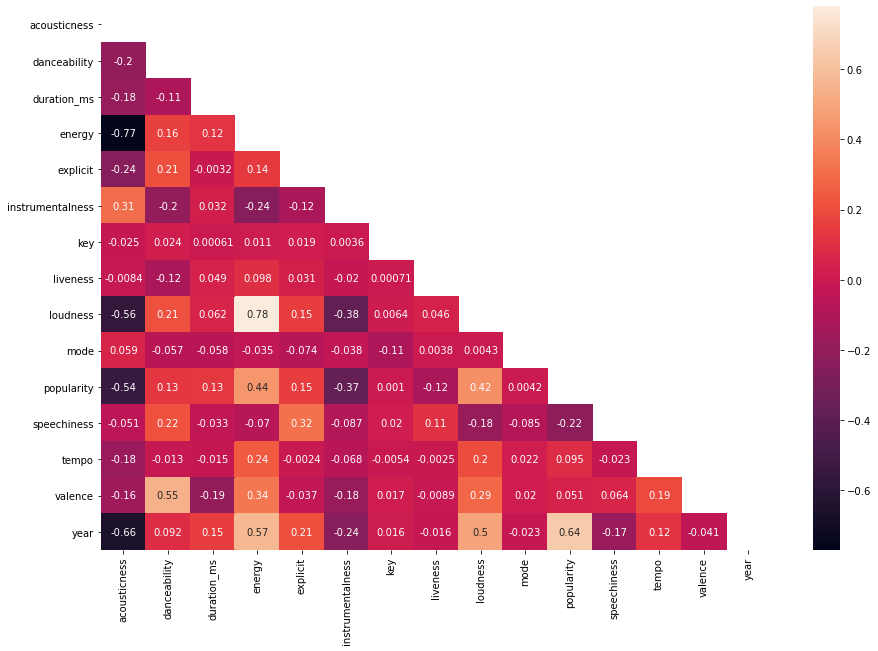

In [14]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=30, random_state=1234)
kmeans.fit(X_prep)


KMeans(n_clusters=30, random_state=1234)

In [16]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()


0      689
1     1147
2      852
3      895
4     1337
5      497
6      244
7     1037
8      843
9      254
10     457
11     626
12     811
13     814
14     704
15     550
16     397
17     801
18     409
19     841
20     764
21     913
22     789
23      21
24     203
25     722
26     733
27     159
28    1064
29     427
dtype: int64

In [17]:
X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367,7
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367,7
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367,4
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367,10
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367,5


In [18]:
kmeans.inertia_

111063.46524741966

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

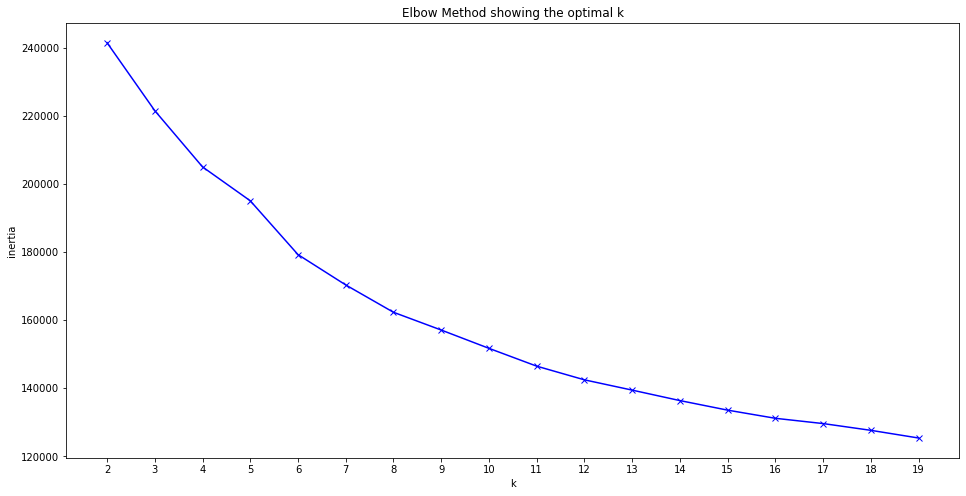

In [19]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

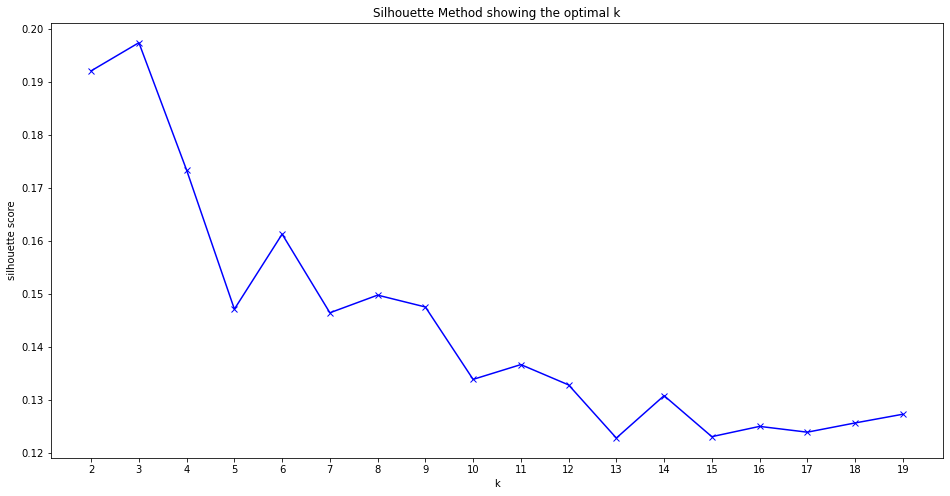

In [20]:
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [21]:
xx =[10,20,40,50,60]
yy =[3,5,7,9]
zz = [2,3,4,5]
ww = [0,1,2]
for x in xx:
    for y in yy:
        for z in zz:
            for w in ww:
            
                kmeans = KMeans(n_clusters=x,
                                init="random",
                                n_init=y,  # try with 1, 4, 8, 20, 30, 100...
                                max_iter=z,
                                tol=w,
                                algorithm="full",
                                random_state=1234)
                kmeans.fit(X_prep)
                if kmeans.inertia_ < 1000000:
                    print(x,y,z,w)
                    print(kmeans.inertia_)


10 3 2 0
162387.1775633103
10 3 2 1
162387.1775633103
10 3 2 2
162387.1775633103
10 3 3 0
158870.03743787517
10 3 3 1
158870.03743787517
10 3 3 2
161774.71154524438
10 3 4 0
156169.8524972759
10 3 4 1
156169.8524972759
10 3 4 2
156169.8524972759
10 3 5 0
154712.4487816581
10 3 5 1
156169.8524972759
10 3 5 2
156169.8524972759
10 5 2 0
162387.1775633103
10 5 2 1
162387.1775633103
10 5 2 2
162387.1775633103
10 5 3 0
158870.03743787517
10 5 3 1
158870.03743787517
10 5 3 2
161774.71154524438
10 5 4 0
156169.8524972759
10 5 4 1
156169.8524972759
10 5 4 2
156169.8524972759
10 5 5 0
154712.44878165808
10 5 5 1
156169.8524972759
10 5 5 2
156169.8524972759
10 7 2 0
162387.1775633103
10 7 2 1
162387.1775633103
10 7 2 2
162387.1775633103
10 7 3 0
158870.03743787517
10 7 3 1
158870.03743787517
10 7 3 2
161774.71154524438
10 7 4 0
156169.8524972759
10 7 4 1
156169.8524972759
10 7 4 2
156169.8524972759
10 7 5 0
154712.44878165808
10 7 5 1
155381.38639300718
10 7 5 2
156169.8524972759
10 9 2 0
162387.

In [30]:
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=400,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

221495.40669728746


In [31]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [32]:
# creating a copy of the num dataset
df_cluster = num.copy()
df_cluster = df_cluster.iloc[:174389]

In [33]:
df_cluster

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


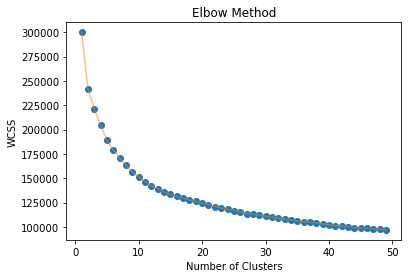

In [44]:
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50), wcss, 'o')
plt.plot(range(1 , 50) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

# The number we're looking for is the position where the line starts to flatten, making it look like an elbow for the plot. 
# After some testing, I've figured out that 8 clusters yield better results.

In [37]:
wcss

[299999.9999999998,
 241455.20530794028,
 221495.8289387773,
 204463.22220816283,
 188907.6268397515,
 179229.70278928985,
 170568.234610219,
 163247.42300830726,
 156765.4927661707,
 151277.32499417776,
 146467.26675180875,
 142561.9129386291,
 139429.33030330998,
 135958.4513257503]

In [38]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_prep)

In [46]:
y_kmeans.shape

(20000,)

In [48]:
X_prep.shape

(20000, 15)

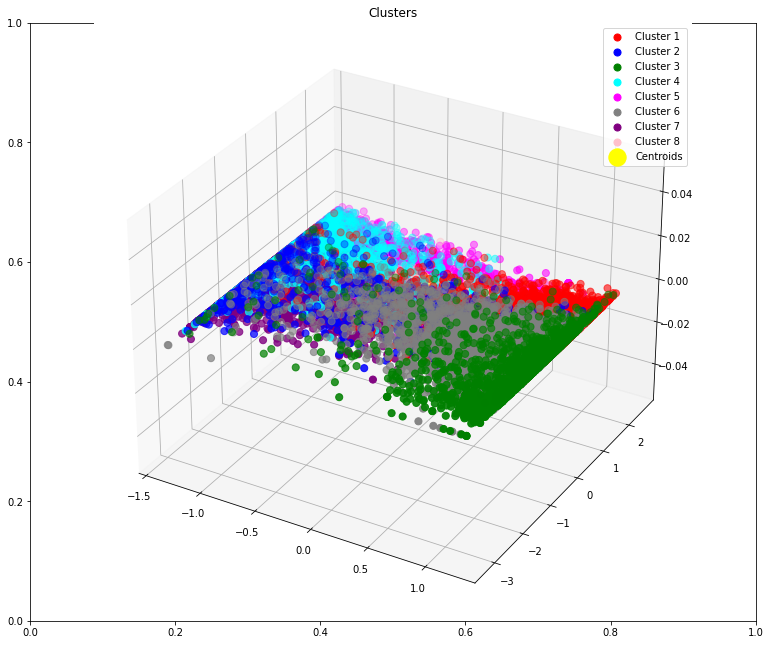

In [39]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_prep[y_kmeans == 0,0],X_prep[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(X_prep[y_kmeans == 1,0], X_prep[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(X_prep[y_kmeans == 2,0], X_prep[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(X_prep[y_kmeans == 3,0], X_prep[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(X_prep[y_kmeans == 4,0], X_prep[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(X_prep[y_kmeans == 5,0], X_prep[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(X_prep[y_kmeans == 6,0], X_prep[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(X_prep[y_kmeans == 7,0], X_prep[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=30)    
kmeans.fit(X_prep)
y_kmeans = kmeans.predict(X_prep)
y_kmeans

array([12, 12,  7, ..., 23, 22, 23])

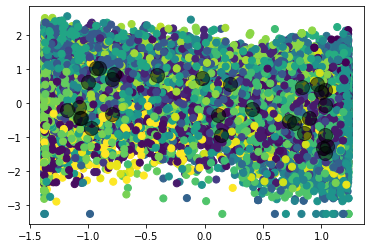

In [52]:
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [49]:
from sklearn.cluster import DBSCAN


In [83]:
model = DBSCAN(eps=0.99, min_samples=8)
# fit model and predict clusters
yhat = model.fit_predict(X_prep)

In [84]:
clusters1 = np.unique(yhat)
clusters1

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

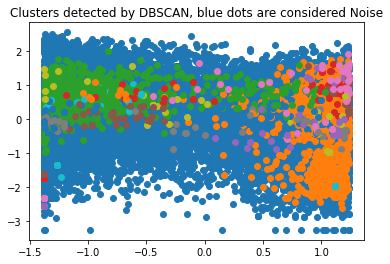

In [85]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
for cluster in clusters1:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    #X_df[x_df['clusters'] == cluster]
    # create scatter of these samples
    plt.scatter(X_prep[row_ix, 0], X_prep[row_ix, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

In [ ]:
#is possible that to get better results but for MVP I decided to keep the results on 30 clusters as on the first test

In [86]:
data["cluster"]=clusters
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year,cluster
name,,,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920,7
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920,7
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920,4
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920,10
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920,5


 Volume in drive C is Acer
 Volume Serial Number is F4E7-13B4

 Directory of C:\Users\thecr\OneDrive\Documents\WEEK 7

25/02/2021  16:39    <DIR>          .
25/02/2021  16:39    <DIR>          ..
24/02/2021  19:01    <DIR>          .ipynb_checkpoints
25/02/2021  15:40           190.173 clusters.png
24/02/2021  17:42        33.089.392 data.csv
24/02/2021  00:40    <DIR>          Day 2 week 7
24/02/2021  23:14    <DIR>          Day 3 week 7
25/02/2021  15:50            14.352 Elbow_Method.png
25/02/2021  16:39           771.525 Spotify 2nd part from Kaggle-Copy1.ipynb
25/02/2021  15:14           229.374 Spotify 2nd part from Kaggle.ipynb
22/02/2021  23:05        11.454.619 Web scrape lab .ipynb
25/02/2021  15:11    <DIR>          Weekly project clean
               6 File(s)     45.749.435 bytes
               6 Dir(s)  412.819.288.064 bytes free
